# ***Neural Networks From Scratch***
------------------

In [88]:
# tutorial following https://www.youtube.com/watch?v=w8yWXqWQYmU
# using both MNIST and Fashion-MNIST datasets

In [18]:
!python --version

Python 3.11.8


# ***Digit classification using MNIST***
-------------------

![MNIST](./MNIST/MnistExamplesModified.png)

In [2]:
# each image is a black and white 28 x 28 pixels array of 8 bit unsigned integers (8 bit pixel depth)
# pixel values range from 0 (white) to 255 (black)

# pixels per image
# 28 x 28 = 784

In [3]:
# we could visualize the images as a matrix with N rows for each image with PPIMAGE number of columns
# when we transpose this we get a matrix where each column is made of PPIMAGE pixels from each image and 
# each row represents nth pixel from every image

# n - total number of pixels
# N - total number of images

# $${\underbrace{\begin{bmatrix}
X_{0} \dots X_{784} \\
X_{785} \dots X_{1568} \\
\dots \\
\dots \\
\dots \\
\dots \\
X_{n - 784} \dots X_{n}\\
\end{bmatrix}}_{N \times 784}}^T = 
\underbrace{\begin{bmatrix}
X_{0} & X_{785} & \dots & X_{n - 784}\\
\vdots & \vdots & \vdots & \vdots \\
X_{784} & X_{1568} & \dots & X_{n}\\
\end{bmatrix}}_{784 \times N}
$$

In [4]:
# our predictions will be the digit class (0..9)!
# we'll start with a simple neural network with just 3 layers.

# one input layer with 784 nodes (0th layer)
# one hidden layer with 10 nodes (1st layer)
# and an output layer with 10 nodes (2nd layer)

In [5]:
# the input layer does not really have any parameters.
# it's just the inputs.
# every node in the input layer corresponds to each of the pixel in the image, hence 784 nodes.
# similarly, the output layer corresponds to each of the 10 digits that could be recognized, hence 10 nodes.

In [6]:
# Neural network with just one hidden layer

# $$I \Longrightarrow H \Longrightarrow O$$

In [7]:
# In a neural network nodes hold results and connections hold weights

# ***Math: Forward propagation***
------------------

# $\underbrace{M}_{R \times C}$

In [8]:
# matrix dimension notation:

# R = |rows|
# C = |columns|

In [9]:
# forward propagation
# N is the number of images in the dataset

# I represents the input layer, that takes in the raw pixels
# we are passing images one by one

## $\underbrace{I}_{784 \times N} = |pixels| \times |images|$

In [10]:
# H is the hidden layer

# H is the unactivated hidden layer
# W is the weights of the connections between the 784 nodes in the input layer and the 10 nodes in the hidden layer
# I is input layer (representing N images, each with 784 pixels)
# W x I is the matrix dot product of W and I
# B is constant bias values for each node in the hidden layer

## $\underbrace{H}_{10 \times N} = \underbrace{W}_{784 \times 10} \cdot \underbrace{I}_{784 \times N} + \underbrace{B}_{10 \times 1}$

In [11]:
# H hat is the activated hidden layer

# H hat is the result of applying an activation function to the unactivated the hidden layer

## $\underbrace{\hat{H}}_{10 \times N} = \underbrace{f_{activation}(H)}_{10 \times N}$

In [12]:
# there are multiple activation functions available
# our choice for the activation fucntion will be ReLU (Rectified Linear Unit)
# so, H hat becomes,

## $\underbrace{\hat{H}}_{10 \times N} = \underbrace{ReLU(H)}_{10 \times N}$

## $$ReLU(x): ~ x ~ if ~ (x > 0) ~ else ~ 0$$

In [13]:
# ReLu is a very simple function, it returns x when x > 0 and returns 0 when x <= 0

In [14]:
# without an activation function, a neural network won't be able to do anything extraordinary
# if all we did was to add layers with weights and biases, we'll end up with a fancy liner combination of weights and biases
# i.e a glorified linear regression model
# the activation function is what makes neural networks stand out.

In [15]:
# O is our unactivated output layer

# w is the weights of connections between each node in the hidden layer and each node in the output layer
# H hat is the activated hidden layer
# b is constant bias term for each node in the output layer

## $\underbrace{O}_{10 \times N} = \underbrace{w}_{10 \times 10} \cdot \underbrace{\hat{H}}_{10 \times N} + \underbrace{b}_{10 \times 1}$

In [16]:
# O hat is the activated output layer

# the activation function we choose to use here is softmax
# softmax function turns the output layer into probabilities
# this distributes probabilities for each of the node in the output layer, corresponding to the 10 digit labels
# sum of all these 10 probabilities will be 1.0
# the node with the highest probability will be picked as the label for the given image (array of pixels)

## $\underbrace{\hat{O}}_{10 \times N} = \underbrace{f_{softmax}(O)}_{10 \times N}$

In [17]:
# values of each node in the output layer gets transformed into probabilities for each label

## $$softmax(\underbrace{\begin{bmatrix}
0.9 \\
1.7 \\
8.4 \\
\vdots \\
2.1 \\
8.5 \\
9.1 \\
\end{bmatrix}}_{10 \times 1}) = 
\underbrace{\begin{bmatrix}
0.10 \\
0.23 \\
0.00 \\
\vdots \\
0.74 \\
0.01 \\
0.01 \\
\end{bmatrix}}_{10 \times 1}$$

In [18]:
# in the above example, we'll pick 7 as the label for the given image

In [19]:
# softmax activation function:

# $$softmax = \frac{e^O}{\sum_{j = 1}^{K} {e_{j}}^O}$$

In [20]:
# K is the dimension of the softmax activated layer
# in our case K = 10
# softmax result is equal to e^(node of choice) / sum of e^(node) for all nodes in the softmax activated layer
# after the softmax activation, each output will be in the range of 0 and 1.

# ***Math: Back propagation***
------------------

In [21]:
# now that we have our predictions, we'll move backwards to compute how much our prediction deviates from the true label (using the training lables)
# we'll then determine how much each previous weights and biases contributed to this deviation and
# we'll tune those parameters accordingly to lower this difference in the next iteration.
# we'll continue doing this until we get the lowest possible/acceptable errors (biases)

In [22]:
# dO is error of the output layer
# we'll subtract the true label from the softmax result
# since softmax result is an array of probabilities, we'll one hot encode the true label and do an elementwise subtraction

## $$prediction = \underbrace{\begin{bmatrix}
0.01 \\
0.05 \\
0.69 \\
\vdots \\
0.00 \\
0.10 \\
0.07 \\
\end{bmatrix}}_{10 \times 1}
$$

In [23]:
# suppose our true label was 2

## $$\text{one hot encoded label} = \underbrace{\begin{bmatrix}
0 \\
0 \\
1 \\
\vdots \\
0 \\
0 \\
0 \\
\end{bmatrix}}_{10 \times 1}$$

In [24]:
# to detrmine the error of the output layer,
# error = predicted probabilities - one hot encoded probabilities of the correct label

# $$\underbrace{\mathrm{d}O}_{10 \times N} = \underbrace{\hat{O}}_{10 \times N} - \underbrace{L_{True}}_{10 \times N}$$

## $$\mathrm{d}O_i = \begin{bmatrix}
0.01 \\
0.05 \\
0.69 \\
\vdots \\
0.00 \\
0.10 \\
0.07 \\
\end{bmatrix} - \begin{bmatrix}
0 \\
0 \\
1 \\
\vdots \\
0 \\
0 \\
0 \\
\end{bmatrix}$$

In [25]:
# now the next part is deciding how much w and b (weight and biase from the output layer O) contributed to the deviation from 
# correct probabilities and predicted probabilities
# dw is the derivative of loss function (softmax) with respect to the weights of nodes in output layer

# dimensions of H hat is 10 x N
# dimensions of transposed H hat is N X 10

# $$\underbrace{\mathrm{d}{w}}_{10 \times 10} = \frac{  \overbrace{\mathrm{d}{O}}^{10 \times N} \cdot   \overbrace{\hat{H}^T}^{N \times 10}}{N}$$

In [26]:
# then, determination of b's (biases from the output layer) contribution to the error,
# this is just the average of absolute error 
# sum(dO) means sum the prediction errors from all images

# $$\underbrace{\mathrm{d}{b}}_{10 \times 1} =  \frac{\sum_{i~=~1}^{N}{\overbrace{\mathrm{d}{O_i}}^{10 \times 1}}}{N}$$

In [27]:
# now, we'll calculate how much the hidden layer was off by,
# f'() is the derivative of the activation function used in forward propagation
# this is done to undo the effect of the activation function

# $$\underbrace{\mathrm{d}{H}}_{10 \times N} = \underbrace{w^T}_{10 \times 10} \cdot \underbrace{\mathrm{d}{O}}_{10 \times N} \times \underbrace{f^{\prime}(H)}_{10 \times N}$$

In [28]:
# after the matrix multiplications, dH's dimension will be 10 x N

In [29]:
# next, we calculate how much the weights and biases of the hidden layer contributed to the error!
# I is the input layer (784 x N)

# $$\underbrace{\mathrm{d}{W}}_{10 \times 784} = \frac{\overbrace{\mathrm{d}{H}}^{10 \times N} \cdot \overbrace{I^T}^{N \times 784}}{N}$$

# $$\underbrace{\mathrm{d}{B}}_{10 \times 1} = \frac{\sum_{i~=~1}^{N}{\overbrace{\mathrm{d}{H_i}}^{10 \times 1}}}{N}$$

In [30]:
# for biases, we compute the average of dH for all images
# dimension of dH is 10 x N
# DIMENSION OF dH_i is 10 x 1

In [31]:
# after all these computations in back propagation, we update the weights and biases as below,

# $W = W - \alpha \cdot \mathrm{d}{W}$
# $B = B - \alpha \cdot \mathrm{d}{B}$
# $w = w - \alpha \cdot \mathrm{d}{w}$
# $b = b - \alpha \cdot \mathrm{d}{b}$

In [32]:
# the alpha here is the learning rate
# it's what's called a HYPER PARAMETER
# IT ISN'T LEARNED BY THE MODEL, IT IS SPECIFIED BY THE PROGRAMMER

In [33]:
# ONCE THE PARANMETERS HAVE BEEN UPDATED, WE RINSE AND REPEAT THE FORWARD AND BACK PROPAGATIONS

In [84]:
# THE MAXIMUM LIMIT ACCEPTED BY np.exp SEEMS 709.7
# ANYTHING ABOVE 709.7 THROWS A FLOATING POINT EXCEPTION

np.exp(709.8)

FloatingPointError: overflow encountered in exp

## ___ReLU___
--------------

In [87]:
x = np.arange(start = -100, stop = 100)
y = ReLU(x)

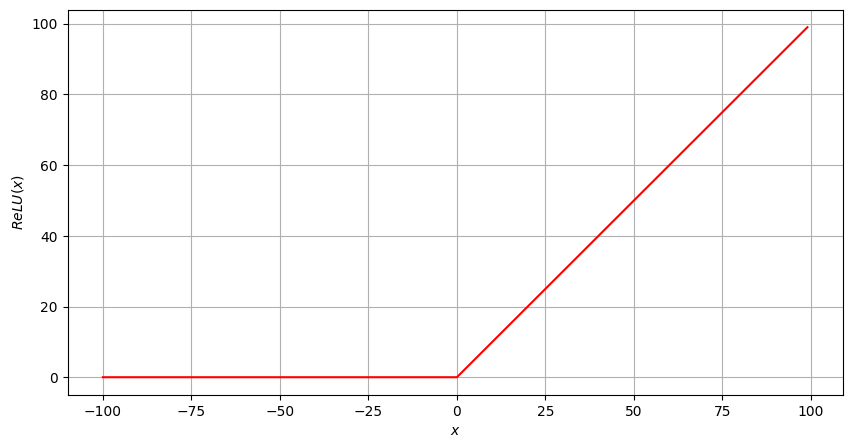

In [88]:
plt.rcParams["figure.figsize"] = 10, 5
plt.plot(x, y, color = "red")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.grid()
plt.show()

# ***Fashion MNIST***
-------------------

![FASHION-MNIST](./Fashion-MNIST/fashion-mnist-sprite.png)

In [10]:
# there are 4 pieces of data
# a training images set, training labels, test set of images and test labels

os.listdir(r"./Fashion-MNIST/")

['fashion-mnist-sprite.png',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

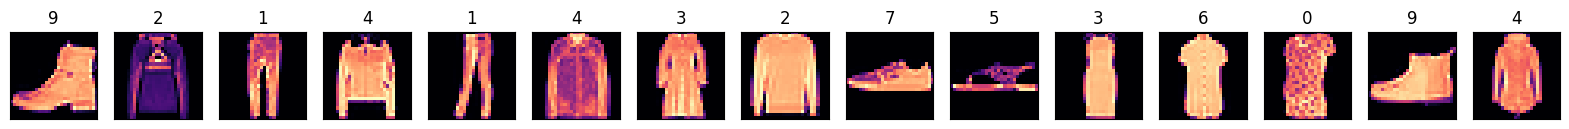

In [11]:
# the datasets are binary files containing images as arrays of 28 x 28 pixels

peek_idx(idx3 = r"./Fashion-MNIST/train-images-idx3-ubyte", idx1 = r"./Fashion-MNIST/train-labels-idx1-ubyte", colormap = "magma")

In [14]:
fashion_images = Idx3(r"./Fashion-MNIST/train-images-idx3-ubyte")
fashion_labels = Idx1(r"./Fashion-MNIST/train-labels-idx1-ubyte")

In [20]:
# let's examine what type of attire each label represents,

np.unique(fashion_labels.data, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

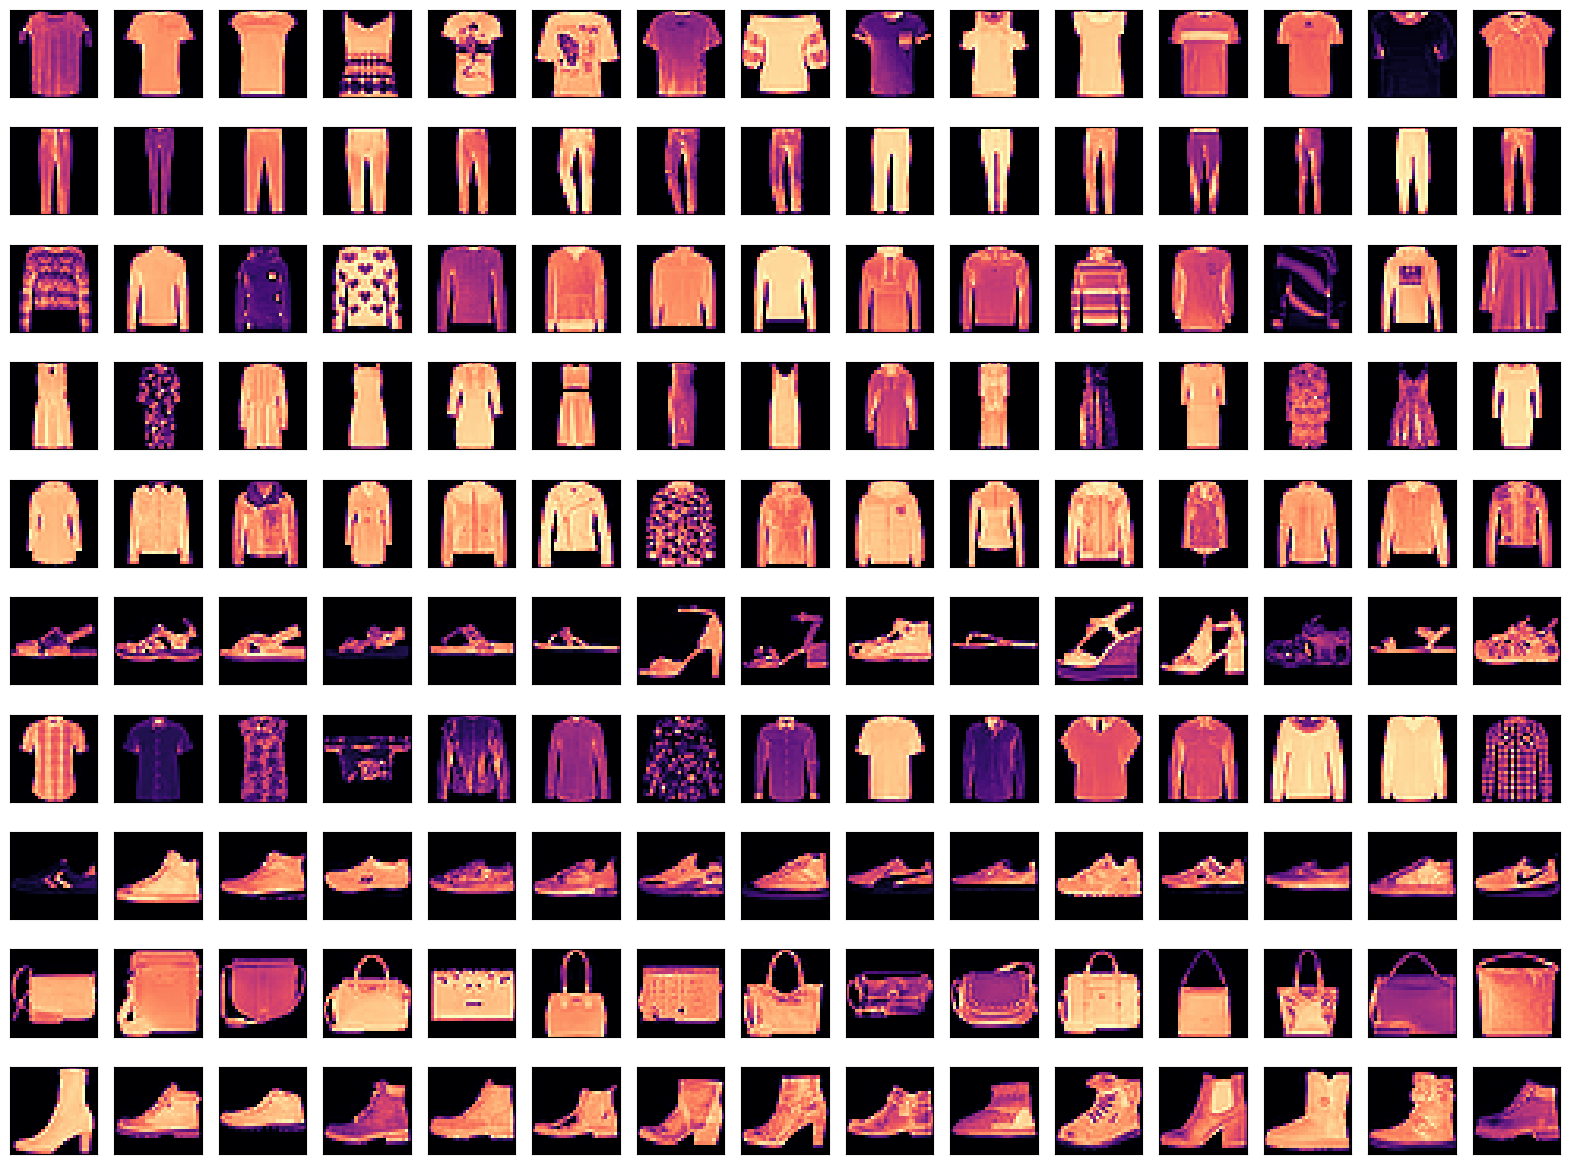

In [76]:
# plot a random sample of 15 images from each label

# sorted label indices 0 .. 9
offset_sorted: NDArray[np.int64] = np.argsort(fashion_labels.data)
# sort the pixel arrays, based on the sorted labels
ims_sorted: NDArray[np.int8] = fashion_images[offset_sorted]

# axes is a 10 x 15 grid.
fig, axes = plt.subplots(nrows = 10, ncols = 15)
fig.set_size_inches(20, 15)

for i, grid_row in enumerate(axes, start = 0):
    offsets: NDArray[np.int64] = (i * 6000) + np.random.randint(low = 0, high = 6000, size = 15, dtype = np.uint64)
    for j, rand in enumerate(offsets, start = 0):
        grid_row[j].imshow(ims_sorted[:, rand].reshape(28, 28), cmap = "magma")
        grid_row[j].set_xticks([])
        grid_row[j].set_yticks([])

plt.show()

In [78]:
FASHION_MNIST_LABELS: Dict[int, str] = {
    0: "T-Shirt",
    1: "Trousers",
    2: "Sweater",
    3: "Frock",
    4: "Jacket",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Hand bag",
    9: "Boots"
}